<a href="https://colab.research.google.com/github/rajeevfromkrec/pytorch/blob/master/Image_classification_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [15]:
dataset= MNIST(root='data/',download=True)

In [16]:
len(dataset)

60000

In [17]:
test_dataset= MNIST(root='data/' ,train=False)

In [18]:
len(test_dataset)

10000

In [19]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F125851BE80>, 5)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

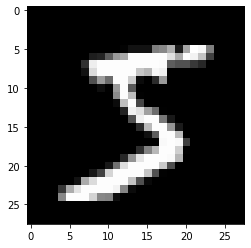

In [21]:
image, label= dataset[0]
plt.imshow(image, cmap='gray')

In [22]:
import torchvision.transforms as transforms

In [23]:
dataset= MNIST(root='data/',transform=transforms.ToTensor(),train=True)

In [24]:
image_tensor, label =dataset[0]
image_tensor.shape

torch.Size([1, 28, 28])

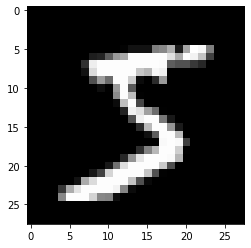

In [25]:
plt.imshow(image_tensor.reshape(28,28), cmap='gray')

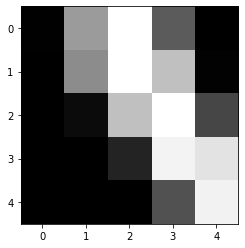

In [26]:
plt.imshow(image_tensor[0,10:15,10:15], cmap='gray');


In [27]:
from torch.utils.data import random_split

In [28]:
train_ds, val_ds= random_split(dataset, [50000, 10000])
len(train_ds) , len(val_ds)

(50000, 10000)

In [29]:
from torch.utils.data import DataLoader

In [30]:
batch_size=128

In [31]:
train_loader= DataLoader(train_ds,batch_size,shuffle=True, drop_last=True)
val_loader= DataLoader(val_ds, batch_size,drop_last=True)



In [32]:
import torch.nn as nn

In [33]:
input_size= 28*28
num_classes=10
model= nn.Linear(input_size, num_classes)

In [34]:
print(model.weight.shape)

torch.Size([10, 784])


In [35]:
model.weight

Parameter containing:
tensor([[ 0.0015, -0.0264,  0.0221,  ...,  0.0347,  0.0136, -0.0062],
        [ 0.0203,  0.0126, -0.0224,  ...,  0.0059,  0.0150, -0.0013],
        [ 0.0021,  0.0331,  0.0152,  ...,  0.0037,  0.0225,  0.0135],
        ...,
        [-0.0174,  0.0312,  0.0066,  ...,  0.0288,  0.0357, -0.0327],
        [ 0.0101,  0.0248,  0.0195,  ...,  0.0236,  0.0329, -0.0355],
        [ 0.0275,  0.0217, -0.0181,  ...,  0.0167, -0.0273, -0.0012]],
       requires_grad=True)

In [36]:
model.bias

Parameter containing:
tensor([-0.0017,  0.0183,  0.0265,  0.0004, -0.0054,  0.0269,  0.0109, -0.0030,
         0.0126,  0.0203], requires_grad=True)

In [37]:
for images,label in train_loader:
  print(label)
  print(images.shape)
  outputs=model(images)
  break

tensor([6, 2, 1, 0, 7, 9, 1, 1, 0, 2, 3, 3, 9, 4, 0, 6, 7, 9, 3, 5, 7, 7, 5, 6,
        0, 9, 1, 5, 7, 4, 6, 3, 9, 3, 2, 9, 1, 1, 2, 3, 4, 6, 4, 4, 4, 3, 3, 7,
        9, 7, 8, 3, 3, 9, 2, 3, 8, 4, 9, 7, 1, 9, 6, 4, 5, 5, 2, 5, 6, 7, 5, 2,
        8, 7, 3, 3, 4, 6, 8, 3, 6, 0, 4, 6, 8, 8, 6, 7, 7, 8, 2, 9, 8, 9, 9, 0,
        4, 8, 0, 2, 8, 9, 5, 3, 4, 1, 7, 2, 3, 2, 0, 5, 1, 6, 0, 8, 5, 1, 2, 0,
        3, 3, 2, 3, 9, 5, 1, 2])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [38]:
class Mnistmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size, num_classes)

  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out=self.linear(xb)
    return out

In [39]:
model=Mnistmodel()

In [40]:
print( model.linear.weight.shape)

torch.Size([10, 784])


In [41]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0289,  0.0157, -0.0036,  ..., -0.0083, -0.0308, -0.0130],
         [-0.0289, -0.0235, -0.0269,  ...,  0.0068,  0.0300,  0.0220],
         [ 0.0026,  0.0183,  0.0111,  ..., -0.0353,  0.0348,  0.0196],
         ...,
         [-0.0085,  0.0336,  0.0353,  ...,  0.0209, -0.0050, -0.0349],
         [ 0.0285, -0.0078,  0.0056,  ...,  0.0234, -0.0019, -0.0071],
         [ 0.0017,  0.0181, -0.0288,  ..., -0.0273,  0.0177,  0.0024]],
        requires_grad=True), Parameter containing:
 tensor([-0.0105, -0.0141, -0.0296,  0.0105,  0.0224,  0.0319, -0.0192, -0.0028,
          0.0242, -0.0271], requires_grad=True)]

In [42]:
for inages, labels in train_loader:
  output=model(images)
  break


In [43]:
print(output.shape)

torch.Size([128, 10])


In [44]:
output[:2,:].data

tensor([[-0.2426, -0.0858,  0.0182,  0.0785,  0.1876, -0.1915, -0.0449,  0.4007,
          0.2371,  0.0647],
        [-0.2473, -0.1299, -0.2389,  0.0754,  0.0917, -0.1980, -0.1571, -0.0629,
          0.1030,  0.1362]])

In [45]:
import torch.nn.functional as F

In [46]:
probs=F.softmax(output,dim=1)

In [47]:
probs[:2].data

tensor([[0.0739, 0.0864, 0.0959, 0.1019, 0.1136, 0.0778, 0.0900, 0.1406, 0.1194,
         0.1005],
        [0.0823, 0.0925, 0.0830, 0.1136, 0.1155, 0.0865, 0.0901, 0.0990, 0.1168,
         0.1208]])

In [48]:
torch.sum(probs[0]).item()

0.9999998807907104

In [49]:
max_probs,pred=torch.max(probs, dim=1)

In [50]:
print(pred)

tensor([7, 9, 9, 4, 4, 9, 7, 7, 7, 7, 4, 8, 7, 4, 7, 7, 9, 9, 9, 7, 9, 9, 9, 4,
        4, 9, 7, 7, 8, 1, 4, 9, 9, 4, 9, 9, 7, 7, 8, 7, 9, 9, 4, 6, 9, 8, 9, 9,
        9, 9, 9, 7, 8, 9, 7, 3, 8, 4, 9, 9, 7, 4, 7, 9, 7, 7, 7, 9, 9, 3, 8, 9,
        8, 9, 8, 7, 6, 7, 9, 8, 4, 7, 9, 6, 9, 9, 9, 0, 9, 8, 7, 7, 7, 9, 8, 4,
        7, 9, 8, 4, 8, 4, 7, 7, 9, 7, 9, 7, 8, 7, 7, 9, 7, 4, 9, 7, 8, 7, 7, 8,
        7, 8, 7, 9, 6, 9, 4, 8])


In [51]:
def accuracy(output, labels):
  _,preds= torch.max(output, dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [52]:
accuracy(output,labels)

tensor(0.0859)

In [53]:
loss_fn= F.cross_entropy

loss= loss_fn(output,labels)
print(loss.item())

2.3160159587860107


In [54]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [55]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [56]:
def fit(epochs, lr,model,train_loader,val_loader,opt_func= torch.optim.SGD):
  history=[]
  optimizer =opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    for batch in train_loader:
      loss=model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    result=evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [57]:
evaluate(model,val_loader)

{'val_acc': 0.053786057978868484, 'val_loss': 2.339158773422241}

In [58]:
history1= fit(5, .001, model,train_loader, val_loader)

Epoch [0], val_loss: 1.9645, val_acc: 0.6033
Epoch [1], val_loss: 1.6918, val_acc: 0.7036
Epoch [2], val_loss: 1.4882, val_acc: 0.7408
Epoch [3], val_loss: 1.3345, val_acc: 0.7681
Epoch [4], val_loss: 1.2164, val_acc: 0.7862


In [59]:
history2= fit(5, .001, model,train_loader, val_loader)

Epoch [0], val_loss: 1.1235, val_acc: 0.8012
Epoch [1], val_loss: 1.0488, val_acc: 0.8111
Epoch [2], val_loss: 0.9877, val_acc: 0.8183
Epoch [3], val_loss: 0.9369, val_acc: 0.8242
Epoch [4], val_loss: 0.8939, val_acc: 0.8288


In [60]:
history3= fit(5, .001, model,train_loader, val_loader)

Epoch [0], val_loss: 0.8571, val_acc: 0.8342
Epoch [1], val_loss: 0.8251, val_acc: 0.8371
Epoch [2], val_loss: 0.7972, val_acc: 0.8397
Epoch [3], val_loss: 0.7725, val_acc: 0.8421
Epoch [4], val_loss: 0.7505, val_acc: 0.8452


In [61]:
history4= fit(5, .001, model,train_loader, val_loader)

Epoch [0], val_loss: 0.7308, val_acc: 0.8475
Epoch [1], val_loss: 0.7130, val_acc: 0.8488
Epoch [2], val_loss: 0.6968, val_acc: 0.8508
Epoch [3], val_loss: 0.6821, val_acc: 0.8529
Epoch [4], val_loss: 0.6686, val_acc: 0.8546


In [68]:
test_dataset= MNIST(root='data/', train=False, transform=transforms.ToTensor())

In [79]:
img,label= test_dataset[1]

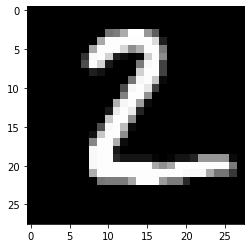

In [80]:
plt.imshow(img[0], cmap='gray')

In [72]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [77]:
def predict_model(img, model):
  xb=img.unsqueeze(0)
  yb=model(xb)
  _, preds= torch.max(yb, dim=1)
  return preds.item()

In [81]:
predict_model(img,model)

2